In [23]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import EmbJSD, EmbHeatGeo, EmbHeatPHATE, EmbCTD, EmbGraphMMD, EmbDer, EmbMarHeatGeo
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from src.cheb import expm_multiply
import networkx as nx
import random

from hyperlib.embedding.treerep import treerep
from hyperlib.embedding.sarkar import sarkar_embedding
from scipy.spatial.distance import pdist, squareform

In [60]:
data, labels = phate.tree.gen_dla(n_branch=5, branch_length=500)
knn=100
anisotropy=0
decay=20
tau=20
n_pca=20
graph = gt.Graph(
                data,
                use_pygsp=True,
                knn=knn,
                anisotropy=anisotropy,
                decay=decay,
                n_pca=n_pca,
            )
labels = {i: m for i, m in enumerate(labels)}

In [61]:
log_P = -np.log(graph.P.toarray()+1e-8)
dist = squareform(pdist(log_P))

In [62]:
d = graph.W.toarray().sum(axis=1)
station = d/d.sum()
root = np.argmax(station)

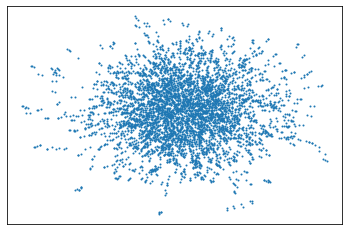

In [63]:
tree_phate = treerep(dist, return_networkx=True)
nx.draw_networkx_nodes(tree_phate,pos=nx.spring_layout(tree_phate), node_size = 1)

In [64]:
embed_2D = sarkar_embedding(tree_phate, root, tau=1.5)

In [56]:
pts = np.array(list(map(float, embed_2D))).reshape(-1,2)

In [57]:
pts.shape

(4936, 2)

In [58]:
pts

array([[ 1.00000000e+00, -1.28509275e-41],
       [ 1.00000000e+00, -1.28509275e-41],
       [ 1.00000000e+00, -1.28509275e-41],
       ...,
       [ 1.00000000e+00, -1.28509275e-41],
       [ 1.00000000e+00, -1.28509275e-41],
       [ 1.00000000e+00, -1.28509275e-41]])

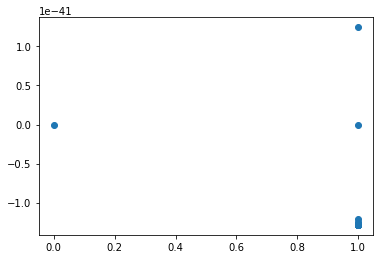

In [59]:
plt.scatter(pts[:,0],pts[:,1])

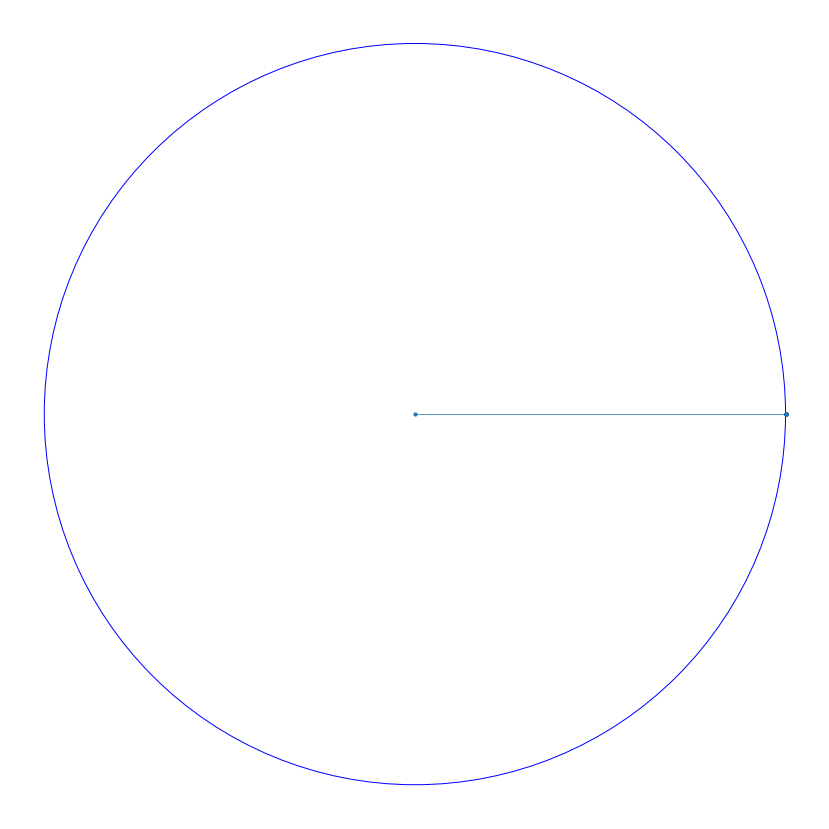

In [38]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_embedding(G, embedding, **kwargs):
    pts = np.array(list(map(float, embedding))).reshape(-1,2)
    size = kwargs.get("figsize", (15,15))
    plt.figure(figsize=size)
    labels = kwargs.get("labels", None)
    #if labels:
        #for i in labels:
            #plt.annotate(labels[i], pts[i],size=14, bbox=dict(facecolor='grey',alpha=0.1))
    lines = [(pts[e[0]],pts[e[1]]) for e in G.edges]
    lc = LineCollection(lines,linewidths=0.7)
    circle = plt.Circle((0, 0), 1, fill=False, color="b")
    plt.gca().add_artist(circle)
    plt.gca().set_aspect("equal")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    size = kwargs.get("node_size", 10)
    plt.scatter(pts[:,0],pts[:,1], s=size)
    plt.gca().add_collection(lc)
    plt.axis("off")
    plt.show()

plot_embedding(tree_phate, embed_2D, labels=labels)